<a href="https://colab.research.google.com/github/Lelan30/Open-Projects/blob/main/Predict_Fraudulent_Transactions_W_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Predicting Credit Car Fraud***

**Credit Card Fraud Detection**

Stack:

* **TensorFlow**

* **[t-SNE](https://https://www.datacamp.com/tutorial/introduction-t-sne)**





---
The goal for this analysis is to predict credit card fraud in the ***transactional data***.


* EDA
* Building the NN (Neural Network)
* Visualization with t-SNE



---
Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud




---
# **IMPORTS:**



In [1]:
import pandas as pd
import json
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from zipfile import ZipFile
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


# **Configure Enviroment:**

In [2]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"","key":""}

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# **Download:**

In [3]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

100% 66.0M/66.0M [00:00<00:00, 151MB/s]
100% 66.0M/66.0M [00:00<00:00, 148MB/s]


# **Unzip:**

In [4]:
file_name="/content/creditcardfraud.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


# **Load In Dataset:**

In [5]:
df = pd.read_csv('/content/creditcard.csv')

# **EDA:**

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Checking nulls
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We have 0 null values so we can continue on from here.

In [10]:
# How time compares against frudulent and normal transactions
print('Fraud: ')
print(df.Time[df.Class == 1].describe())

print('---------------')

print('Normal: ')
print(df.Time[df.Class == 0].describe())

Fraud: 
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64
---------------
Normal: 
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


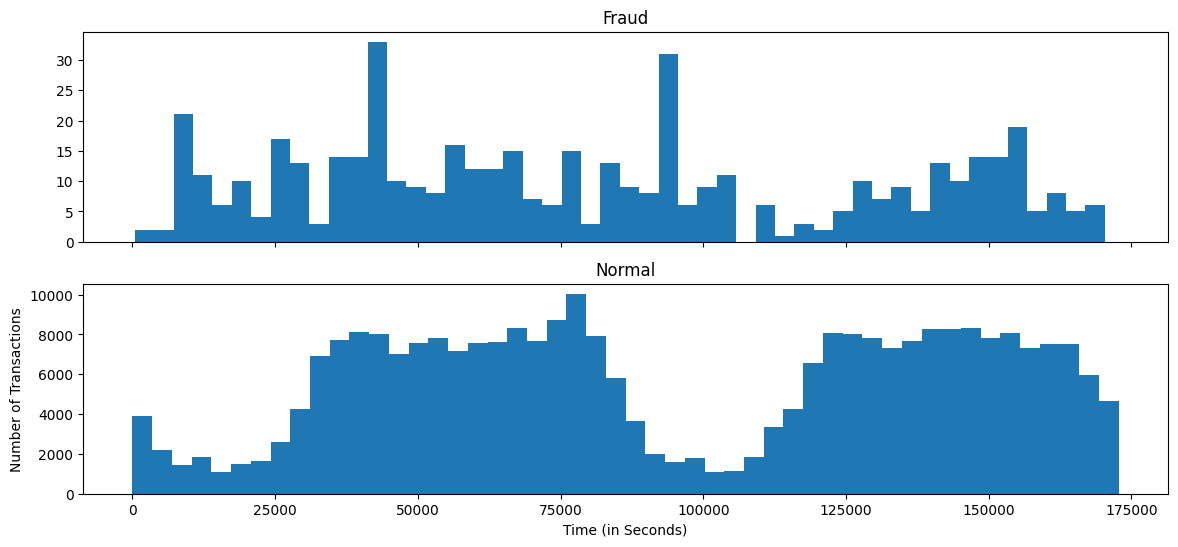

In [11]:
# Plotting information from above:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 6))
bins = 50

ax1.hist(df.Time[df.Class == 1], bins= bins)
ax1.set_title('Fraud')
ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

Fraudulent transactions seem more uniformly (fixed) distributed, while normal transactions have more of a cyclical distribution.

In [12]:
# How the transactions differ between the two
print('Fraud: ')
print(df.Amount[df.Class == 1].describe())

print('-------------')

print('Normal: ')
print(df.Amount[df.Class == 0].describe())

Fraud: 
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
-------------
Normal: 
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


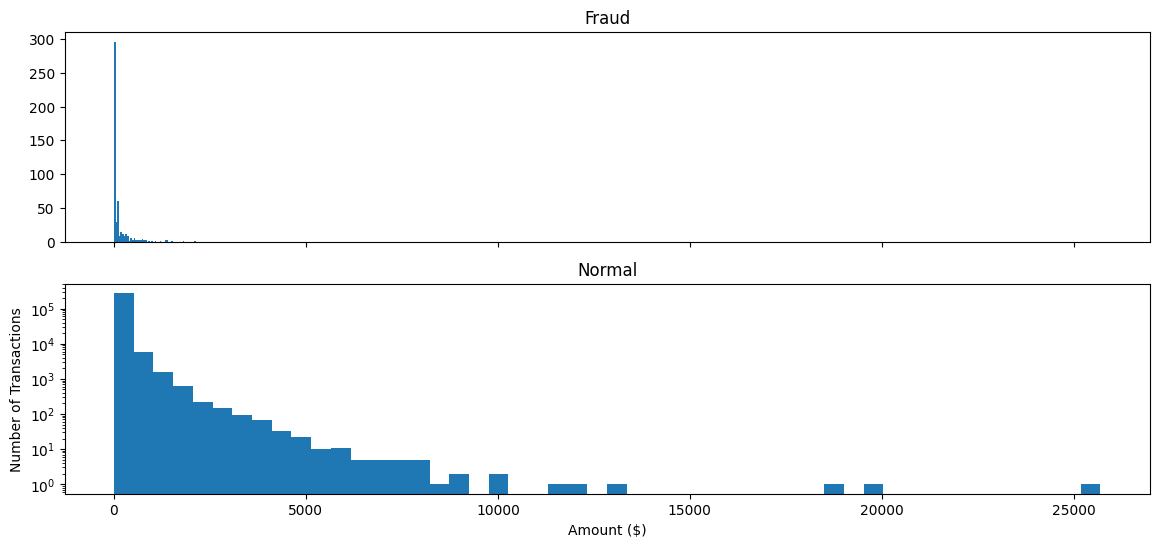

In [13]:
# Plotting information from above:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 6))
bins = 50

ax1.hist(df.Amount[df.Class == 1], bins= bins)
ax1.set_title('Fraud')
ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Most transactions are for small amounts of money. Seems like they are less than $100.

Fraudulent transactions have a max and min value FAR less than 2,125.87 vs the 25,691.16

In [14]:
df['Amount_max_fraud'] = 1
df.loc[df.Amount <= 2125.87, 'Amount_max_fraud'] = 0

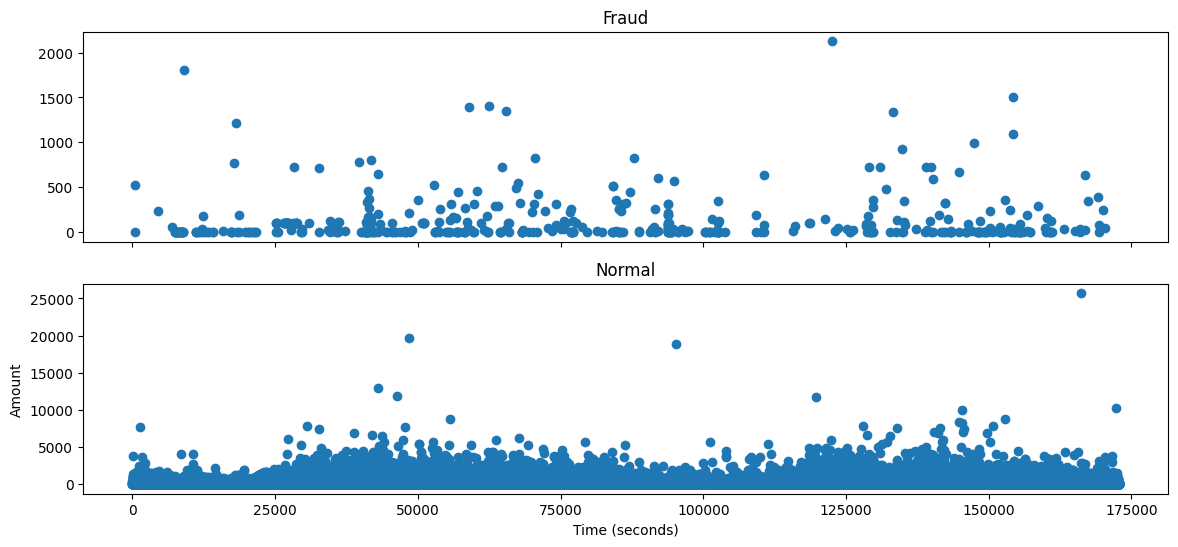

In [15]:
# Comparing the TIME with AMOUNT
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')
ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (seconds)')
plt.ylabel('Amount')
plt.show()

In [16]:
# Checking anonymized feature
a_features = df.iloc[:,1:29].columns

<ipython-input-17-43e81e5e612a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class == 1], bins=50)
<ipython-input-17-43e81e5e612a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class == 0], bins=50)
<ipython-input-17-43e81e5e612a>:5: UserWarning: 

`distplot` is a depr

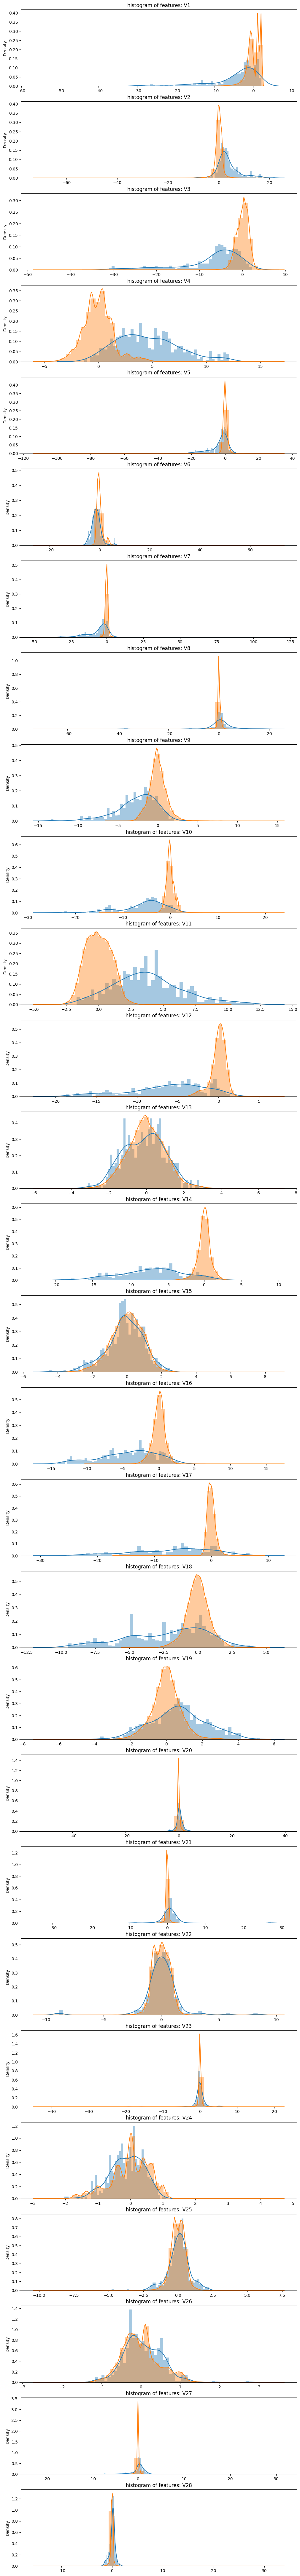

In [17]:
plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[a_features]):
  ax = plt.subplot(gs[i])
  sns.distplot(df[cn][df.Class == 1], bins=50)
  sns.distplot(df[cn][df.Class == 0], bins=50)
  ax.set_xlabel('')
  ax.set_title('histogram of features: ' + str(cn))
plt.show()

In [18]:
# Dropping similar features considering the distribution type
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'],
             axis=1)


In [19]:
'''
Creating features identifying values where fraudulent transactions are more
common
'''
df['V1_'] = df.V1.map(lambda x: 1 if x < -3 else 0)
df['V2_'] = df.V2.map(lambda x: 1 if x > 2.5 else 0)
df['V3_'] = df.V3.map(lambda x: 1 if x < -4 else 0)
df['V4_'] = df.V4.map(lambda x: 1 if x > 2.5 else 0)
df['V5_'] = df.V5.map(lambda x: 1 if x < -4.5 else 0)
df['V6_'] = df.V6.map(lambda x: 1 if x < -2.5 else 0)
df['V7_'] = df.V7.map(lambda x: 1 if x < -3 else 0)
df['V9_'] = df.V9.map(lambda x: 1 if x < -2 else 0)
df['V10_'] = df.V10.map(lambda x: 1 if x < -2.5 else 0)
df['V11_'] = df.V11.map(lambda x: 1 if x > 2 else 0)
df['V12_'] = df.V12.map(lambda x: 1 if x < -2 else 0)
df['V14_'] = df.V14.map(lambda x: 1 if x < -2.5 else 0)
df['V16_'] = df.V16.map(lambda x: 1 if x < -2 else 0)
df['V17_'] = df.V17.map(lambda x: 1 if x < -2 else 0)
df['V18_'] = df.V18.map(lambda x: 1 if x < -2 else 0)
df['V19_'] = df.V19.map(lambda x: 1 if x > 1.5 else 0)
df['V21_'] = df.V21.map(lambda x: 1 if x > 0.6 else 0)

In [20]:
# Creating new features for normal transactions
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

In [21]:
# Renaming 'Class' to 'Fraud'
df = df.rename(columns={'Class':'Fraud'})

In [22]:
print(df.Normal.value_counts())
print('-----------------')
print(df.Fraud.value_counts())

1.0    284315
0.0       492
Name: Normal, dtype: int64
-----------------
0    284315
1       492
Name: Fraud, dtype: int64


In [23]:
pd.set_option('display.max_columns',101)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Fraud,Amount_max_fraud,V1_,V2_,V3_,V4_,V5_,V6_,V7_,V9_,V10_,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_,Normal
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


In [24]:
# Creating ONLY fraud and Normal df for trnasactions
Fraud = df[df.Fraud == 1]
Normal = df[df.Normal == 1]

In [25]:
# Setting X_train equal to 80% of fraudulent transactions
X_train = Fraud.sample(frac=0.8)
count_Frauds = len(X_train)

# Add 80% of the normal transactions to X_train
X_train = pd.concat([X_train, Normal.sample(frac=0.8)], axis=0)

# X_test contains all transactions not in X_train
X_test = df.loc[~df.index.isin(X_train.index)]

In [26]:
# Randomized training order by shuffling
X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [27]:
# Adding target features to y_train and y_test
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)

y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)

In [28]:
# Dropping target features
X_train = X_train.drop(['Fraud','Normal'], axis=1)
X_test = X_test.drop(['Fraud','Normal'], axis=1)

In [29]:
print('Length of X_test: ', len(X_test))
print('Length of y_test: ', len(y_test))
print('Length of X_train: ', len(X_train))
print('Length of y_train: ', len(y_train))


Length of X_test:  56961
Length of y_test:  56961
Length of X_train:  227846
Length of y_train:  227846


In [30]:
'''
Since the data is imbalanced we can balance the data out with the equation below
Number of fraud * ratio = number of normal
'''
ratio = len(X_train)/count_Frauds
y_train.Fraud *= ratio
y_test.Fraud *= ratio

In [31]:
features = X_train.columns.values

In [32]:
'''
In order to assist with training the Neural Network; we will transform each
feature so that it has a mean of 0 and a STD of 1.
'''
for feature in features:
  mean, std = df[feature].mean(), df[feature].std()
  X_train.loc[:, feature] = (X_train[feature] - mean) / std
  X_test.loc[:, feature] = (X_test[feature] - mean) / std

# **Train the Neural Network**

In [33]:
# Splitting dataset into validation and testing set
split = int(len(y_test)/2)

inputX = X_train.values
inputY = y_train.values

inputX_valid = X_test.values[:split]
inputY_valid = y_test.values[:split]

inputX_test = X_test.values[split:]
inputY_test = y_test.values[split:]

In [34]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
'''
.placeholder() , .reset_default_graph() , and others
were removed with version 2 of the TensorFlow library.
'''

input_nodes = 37
multiplier = 1.5

# Number of nodes in each hidden layer
hidden_nodes1 = 18
hidden_nodes2 = round(hidden_nodes1 * multiplier)
hidden_nodes3 = round(hidden_nodes2 * multiplier)

# Percent of nodes to keep during dropout
pkeep = tf.placeholder(tf.float32)

output_nodes = 2

Instructions for updating:
non-resource variables are not supported in the long term


In [35]:

# Define the placeholders for input and output
x = tf.placeholder(tf.float32, shape=(None, input_nodes))
# y = tf.placeholder(tf.float32, shape=(None, output_nodes))

# Define the weights and biases for each layer
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))

W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))

W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.15))
b3 = tf.Variable(tf.zeros([hidden_nodes3]))

W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, output_nodes], stddev = 0.15))
b4 = tf.Variable(tf.zeros([output_nodes]))

# Define the forward pass through the network
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)
y_pred = tf.nn.sigmoid(tf.matmul(y3, W4) + b4)

# output
y = y4
y_ = tf.placeholder(tf.float32, [None, 2])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [40]:
# Parameters
training_epochs = 5
training_dropout = 0.9
display_step = 1
n_samples = y_train.shape[0]
batch_size = 2048
learning_rate = 0.005

In [41]:
# Cross Entropy: as Cross Function
cost = -tf.reduce_sum(y_ * tf.log(y))

# AdamOptimizer: as optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Correct Prediction: value from softmax equals target value
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [47]:
# Record accuracy values for plot
accuracy_summary = []

# Record cost summary
cost_summary = []

valid_accuracy_summary = []
valid_cost_summary = []

# Keeping track of number of epochs befor early stopping
stop_early = 0

saver = tf.train.Saver(max_to_keep=1)

# Initialize variables and tensorflow session
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for epoch in range(training_epochs):
    for batch in range(int(n_samples/batch_size)):
      batch_x = inputX[batch*batch_size: (1+batch)*batch_size]
      batch_y = inputY[batch*batch_size: (1+batch)*batch_size]

      sess.run([optimizer],
               feed_dict={x: batch_x,
                          y_: batch_y,
                          pkeep: training_dropout})

      if (epoch) % display_step == 0:
        training_accuracy, newCost = sess.run([accuracy, cost],
                                              feed_dict={x:inputX,
                                                         y_:inputY,
                                                         pkeep:training_dropout})
        valid_accuracy, valid_newCost = sess.run([accuracy, cost],
                                                 feed_dict={x: inputX_valid,
                                                            y_: inputY_valid,
                                                            pkeep: 1})
        print("Epoch:", epoch,
              "Acc =", "{:.5f}".format(training_accuracy),
              "Cost =", "{:.5f}".format(newCost),
              "Valid_Acc =", "{:.5f}".format(valid_accuracy),
              "Valid_Cost =", "{:.5f}".format(valid_newCost))

        # Record the results of the model
        accuracy_summary.append(training_accuracy)
        cost_summary.append(newCost)
        valid_accuracy_summary.append(valid_accuracy)
        valid_cost_summary.append(valid_newCost)

        # if models doesn't imporve after 15 logs, stop training
        if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
          stop_early += 1
          if stop_early == 15:
            break
        else:
          stop_early = 0

        print("--------------------")
        print("Optimazation Finished!")
        print("--------------------")

Epoch: 0 Acc = 0.00416 Cost = 330906.56250 Valid_Acc = 0.00186 Valid_Cost = 42267.27734
--------------------
Optimazation Finished!
--------------------
Epoch: 0 Acc = 0.00504 Cost = 329229.46875 Valid_Acc = 0.00186 Valid_Cost = 42046.32031
--------------------
Optimazation Finished!
--------------------
Epoch: 0 Acc = 0.01966 Cost = 323171.50000 Valid_Acc = 0.00186 Valid_Cost = 41291.18359
--------------------
Optimazation Finished!
--------------------
Epoch: 0 Acc = 0.07789 Cost = 317713.25000 Valid_Acc = 0.00186 Valid_Cost = 40754.53906
--------------------
Optimazation Finished!
--------------------
Epoch: 0 Acc = 0.13434 Cost = 314459.84375 Valid_Acc = 0.00186 Valid_Cost = 40538.44531
--------------------
Optimazation Finished!
--------------------
Epoch: 0 Acc = 0.27588 Cost = 313619.56250 Valid_Acc = 0.00186 Valid_Cost = 40338.58594
--------------------
Optimazation Finished!
--------------------
Epoch: 0 Acc = 0.44491 Cost = 312302.06250 Valid_Acc = 0.00186 Valid_Cost = 40225.

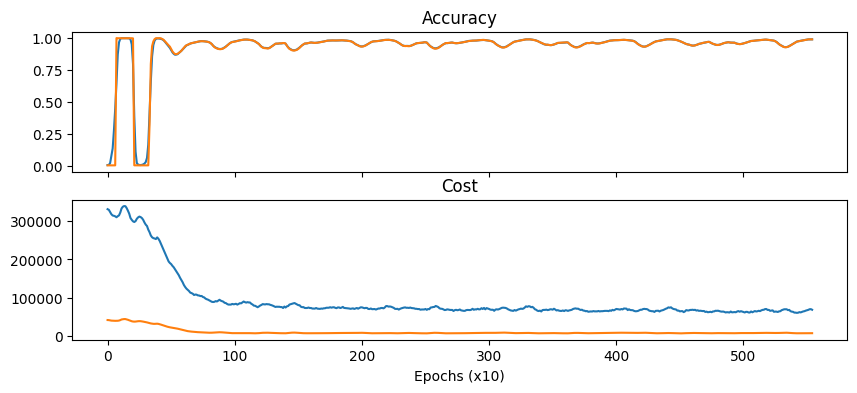

In [48]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.plot(accuracy_summary)
ax1.plot(valid_accuracy_summary)
ax1.set_title('Accuracy')

ax2.plot(cost_summary)
ax2.plot(valid_cost_summary)
ax2.set_title('Cost')

plt.xlabel('Epochs (x10)')
plt.show()

# **Data Visualization with t-SNE**
1.  Use t-SNE with origional data
2.  Use t-SNE with training for NN



In [49]:
tsne_data = pd.read_csv('/content/creditcard.csv')

In [50]:
# setting df2 equal to all fraudulent and 10,000 normal transactions
df2 = tsne_data[tsne_data.Class == 1]
df2 = pd.concat([df2, tsne_data[tsne_data.Class == 0].sample(n = 10000)],
                axis = 0)

In [53]:
# scalling features to imporve traiing ability
standard_scaler = StandardScaler()
df2_std = standard_scaler.fit_transform(df2)

# setting y equal to target values
y = df2.iloc[:,-1].values

In [55]:
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df2_std)

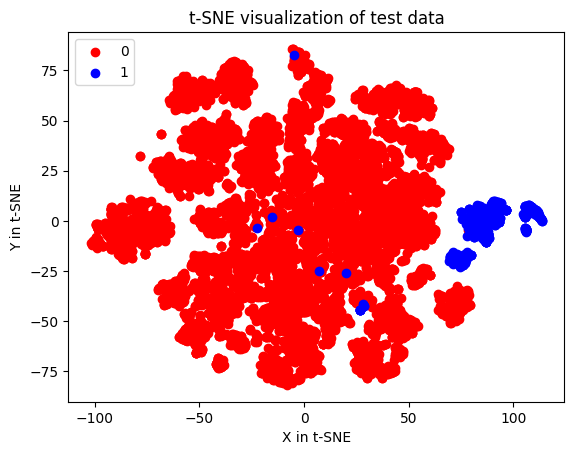

In [58]:
# Scatter plot with two types of transactions
color_map = {0: 'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x=x_test_2d[y==cl,0],
              y=x_test_2d[y==cl,1],
              c=color_map[idx],
              label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

We've used 10,000 out of the 284,315 normal transactions for this visualization to save for memory consumption. Meaning we've used about 3.15% of the data. If all transactions were inculded the layout would look much different.

In [59]:
# df_used: frudulent transactions
df_used = Fraud

# Adding 10,000 normal transactions to df_used
df_used = pd.concat([df_used, Normal.sample(n= 10000)], axis=0)

In [60]:
# Scale features to improve the training ability
df_used_std = standard_scaler.fit_transform(df_used)

# Setting y-used to target values
y_used = df_used.iloc[:,-1].values

In [61]:
x_test_2d_used = tsne.fit_transform(df_used_std)

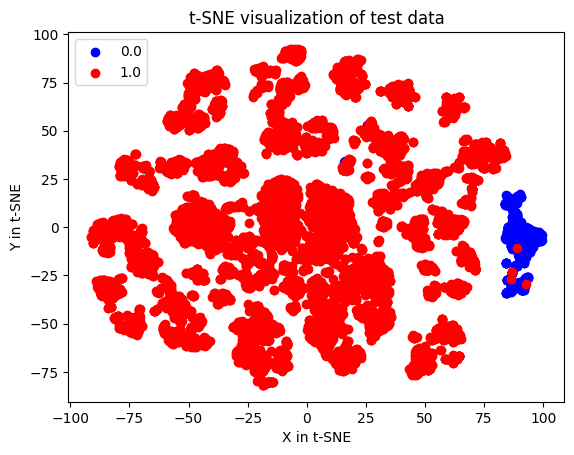

In [62]:
color_map = {1: 'red', 0:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y_used)):
  plt.scatter(x=x_test_2d_used[y_used==cl,0],
              y=x_test_2d_used[y_used==cl,1],
              c=color_map[idx],
              label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()